# Breast Cancer Classification using XGBoost

### 1. Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

### 2. Loading the dataset

In [2]:
df = pd.read_csv("..//tasks/Task 2 - Feature Construction/feature_constructed_dataset2.csv")

### 3. Deleting unneseccory features

In [3]:
df = df.drop(columns=["id"])

### 4. Setting target values

In [4]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

### 5. Splitting X and Y

In [5]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

### 6. Test and train splition

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 7. Feature normalization

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 8. XGBoost configuration

In [8]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss"
)

### 9. Train

In [9]:
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### 10. Test

In [10]:
y_pred = model.predict(X_test_scaled)

### 11. Evaluation

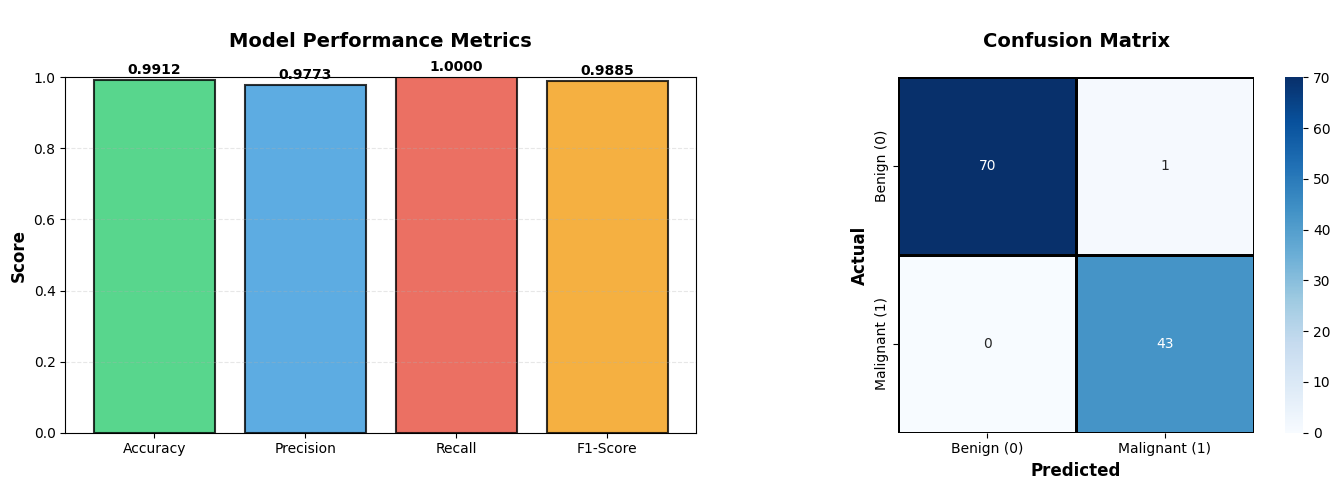

In [11]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print("Accuracy:", acc)
# print("Precision:", prec)
# print("Recall:", rec)
# print("F1:", f1)
# print("Confusion Matrix:\n", cm)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acc, prec, rec, f1]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

bars = axes[0].bar(metrics, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('\nModel Performance Metrics\n', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            ax=axes[1], linewidths=1, linecolor='black', square=True)
axes[1].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[1].set_title('\nConfusion Matrix\n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()